<a href="https://colab.research.google.com/github/tyannasmith/data-science/blob/main/Tyanna_Smith_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

#First I had to gather 25 pics of shoes that are tied and shoes that are untied and then I put them in a google slide show. 

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#I am not really sure what all of the coding means here but I know that some of the codes are telling the system what is what and what I am going to be inserting to get the data that I need

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

#Here I just downloaded the link

In [ ]:
url = "https://docs.google.com/presentation/d/1X6azD16YrFxnnykG3k-YRpfi53HWzQXFnYPaJxWiZLU/edit#slide=id.p"

#Here I inserted the link for my Shoes that are tied and shoes that are untied slideshow

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

#These are all of the images from my slide show

In [ ]:
images.shape

In [7]:
model(images)

tensor([[ 1.8801, -3.0064, -3.8802,  ..., -4.2731,  1.1649,  2.2171],
        [-2.7574, -2.8196, -6.1070,  ..., -4.5374, -1.4345,  2.3864],
        [-1.8829, -2.7189, -3.1276,  ..., -0.2866,  5.1274,  2.9155],
        ...,
        [-2.0395, -2.5000, -3.7125,  ..., -1.3778,  0.4858,  2.9833],
        [-2.4381, -1.2559, -3.0731,  ..., -3.5094,  1.2917,  3.1698],
        [-2.5813, -1.0298, -2.6619,  ..., -4.4949,  0.8219,  2.1164]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images)

In [9]:
y.shape

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [11]:
for i in list(guesses):
    print(labels[i])

swimming trunks, bathing trunks
comic book
shopping basket
running shoe
Loafer
running shoe
electric fan, blower
running shoe
pedestal, plinth, footstall
running shoe
bulletproof vest
running shoe
Loafer
running shoe
saltshaker, salt shaker
potter's wheel
panpipe, pandean pipe, syrinx
envelope
panpipe, pandean pipe, syrinx
can opener, tin opener
web site, website, internet site, site
revolver, six-gun, six-shooter
corkscrew, bottle screw
syringe
envelope
envelope
lighter, light, igniter, ignitor
power drill
letter opener, paper knife, paperknife
envelope
panpipe, pandean pipe, syrinx
envelope
panpipe, pandean pipe, syrinx
assault rifle, assault gun
lighter, light, igniter, ignitor
syringe
letter opener, paper knife, paperknife
lipstick, lip rouge
switch, electric switch, electrical switch
panpipe, pandean pipe, syrinx
letter opener, paper knife, paperknife
screw
envelope
running shoe
analog clock
thimble
lighter, light, igniter, ignitor
web site, website, internet site, site
Band Aid
h

In [12]:
Y = np.zeros(50,)
Y[25:] = 1

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() 

In [15]:
X.shape

(50, 1000)

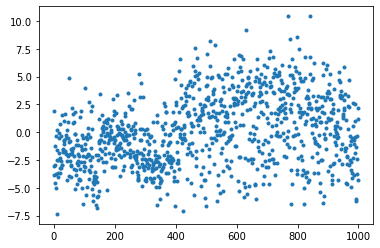

In [16]:
plt.plot(X[0],'.')

In [17]:
X[0]

array([ 1.88007975e+00, -3.00638533e+00, -3.88024306e+00, -4.55210781e+00,
       -2.98351026e+00, -1.26535285e+00, -3.77314854e+00, -5.04082537e+00,
       -3.67159188e-01, -7.35251760e+00,  1.59393698e-01, -1.56850815e+00,
       -2.50655937e+00, -4.06130123e+00, -2.51139188e+00, -3.71523714e+00,
       -1.89228165e+00, -9.27078128e-02, -5.57616115e-01,  7.28075087e-01,
       -3.68647218e+00, -2.28194666e+00, -3.18604779e+00, -3.22411585e+00,
       -2.55684233e+00, -3.09064388e-01, -2.94155264e+00, -2.95714855e+00,
        1.50949860e+00, -1.53829610e+00, -1.75248861e+00, -1.56439483e+00,
       -1.04885685e+00, -8.10100496e-01,  1.01105690e+00, -6.76918387e-01,
        1.65430057e+00, -1.69186449e+00, -1.76856685e+00, -2.71038681e-01,
       -2.00331855e+00, -5.62342048e-01, -4.28003550e+00,  1.62052572e-01,
       -2.62900543e+00, -2.05712342e+00, -5.48328876e-01,  8.92259479e-01,
       -2.12015247e+00, -3.98379183e+00, -9.19374228e-01,  4.87309694e+00,
       -2.55309939e+00, -

In [18]:
np.argmax(X[0])

842

In [19]:
labels[948]

'Granny Smith'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [21]:
for i in top_ten:
    print(labels[i])

swimming trunks, bathing trunks
running shoe
Loafer
sleeping bag
sandal
cowboy boot
diaper, nappy, napkin
buckle
sock
perfume, essence


In [22]:
labels

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 26.,  92., 189., 193., 175., 159., 103.,  51.,   9.,   3.]),
 array([-7.3525176, -5.5738983, -3.7952785, -2.016659 , -0.2380395,
         1.54058  ,  3.3191996,  5.0978193,  6.8764386,  8.655058 ,
        10.433678 ], dtype=float32),
 <a list of 10 Patch objects>)

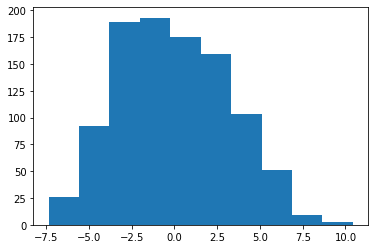

In [23]:
plt.hist(X[0])

In [24]:
X = GPU_data(X)
Y = GPU_data(Y)

In [25]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [ ]:
X.shape

In [30]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [31]:
def model(x,w):

    return x@w[0]

In [32]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: ERROR API key must be 40 characters long, yours was 20


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

https://tensorspace.org/

#It might be the schools WIFI but it will only let me run it twice.